## Busca Heurística

<img src="https://miro.medium.com/max/3604/1*GChPGXvZQiVwjok9EvKPIA.gif" align="center" width="150">
<div align="right">Bruno L. Carli</div>
<div align="right">IAA2021 - UFPR</div>

Exercício estudado na disciplina de **Introdução à Inteligência Artificial** do curso de Especialização em Inteligência Artfical Aplicada da Universidade Federal do Paraná (UFPR). 


#### Definição rápida
A busca heurística é uma busca otimizada que pode encontrar soluções de forma mais eficiente, realizando seu processamento com base em uma **função de avaliação** sobre as informações disponíveis para decidir as etapas a seguir selecionando a alternativa de menor custo.

#### Exemplos de busca heurística

- **Busca Gulosa**:
    + Tenta expandir o nó mais próximo do objetivo;
    + Incompleta: Pode gerar *loops* infinitos (becos sem saída);
    + Heurística: distância em linha reta até o objetivo:

\begin{equation}
    \mathbf{h(n)}
\end{equation}


- **A***:
    + Tenta expandir o nó de menor custo;
    + Implementa um sistema de prioridades ordenadas;
    + Heurística: Soma dos custos com a herística de linha reta até o objetivo:
    
\begin{equation}
    \mathbf{f(n) = g(n) + h(n)}
\end{equation}


#### Dados de exemplo

Para este exercício a heurística em linha reta **h(n)** será definida pela tabela abaixo:

![h_values](https://i.ibb.co/G7jLhnN/Captura-de-Tela-2021-02-25-a-s-13-17-34.png)


Em python poderíamos colocar estes dados em forma de um dicionário (`dict`) da seguinte forma:

In [4]:
h_table = {
    'arad': 366,
    'bucharest': 0,
    'craiova': 160,
    'dobreta': 242,
    'eforie': 161,
    'fagaras': 176,
    'giurgiu': 77,
    'hirsova': 151,
    'iasi': 226,
    'lugoj': 244,
    'mehadia': 241,
    'neamt': 234,
    'oradea': 380,
    'pitesti': 100,
    'rimnicu_vilcea': 193,
    'sibiu': 253,
    'timisoara': 329,
    'urziceni': 80,
    'vaslui': 199,
    'zerind': 374
}

Podemos utilizar o dicionário puro do python para manipular os dados:

In [17]:
print('Valores h(n) para Bucharest:')
print(f'Arad: {h_table["arad"]}')
print(f'Bucharest: {h_table["bucharest"]}')
print(f'Craiova: {h_table["craiova"]}')
print(f'Dobreta: {h_table["dobreta"]}')
print(f'Eforie: {h_table["eforie"]}')

Valores h(n) para Bucharest:
Arad: 366
Bucharest: 0
Craiova: 160
Dobreta: 242
Eforie: 161


Ou visualizar em forma de tabela com pandas:

In [16]:
import pandas as pd
h_df = pd.DataFrame(h_table, index=['h(n)']).T

h_df.head()

,h(n)
arad,366
bucharest,0
craiova,160
dobreta,242
eforie,161


O custo de um ponto para outro é definido peo grafo abaixo:

![custos](https://i.ibb.co/MBZgnzQ/Captura-de-Tela-2021-02-25-a-s-13-47-50.png)

Também podemose definir este grafo na forma de um dicionário python:

In [5]:
data = {
    'lugoj': {
        'timisoara': 111,
        'mehadia': 70
    },
    'timisoara': {
        'lugoj': 111,
        'arad': 118
    },
    'mehadia': {
        'lugoj': 70,
        'dobreta': 75
    },
    'dobreta': {
        'mehadia': 75,
        'craiova': 120,
    },
    'craiova': {
        'rimnicu_vilcea': 146,
        'dobreta': 120,
        'pitesti':138
    },
    'rimnicu_vilcea': {
        'sibiu': 80,
        'craiova': 146,
        'pitesti': 97
    },
    'sibiu': {
        'oradea': 151,
        'fagaras': 99,
        'rimnicu_vilcea': 80,
        'arad': 150
    },
    'oradea': {
        'sibiu': 151,
        'zerind': 75
    },
    'zerind': {
        'oradea': 71,
        'arad': 75
    },
    'arad': {
        'zerind': 75,
        'sibiu': 140,
        'timisoara': 118
    },
    'fagaras': {
        'sibiu': 99,
        'bucharest': 211
    },
    'pitesti': {
        'rimnicu_vilcea': 97,
        'craiova': 138,
        'bucharest': 101
    },
    'bucharest': {
        'fagaras': 211,
        'giurgiu': 90,
        'pitesti': 101,
        'urziceni': 85
    },
    'giurgiu': {
        'bucharest': 90
    },
    'urziceni': {
        'bucharest': 85,
        'hirsova': 98,
        'vaslui': 142
    },
    'hirsova': {
        'urziceni': 98,
        'eforie': 86
    },
    'eforie': {
        'hirsova': 86
    },
    'vaslui': {
        'urziceni': 142,
        'iasi': 92
    },
    'iasi': {
        'vaslui': 92,
        'neamt': 87
    },
    'neamt': {
        'iasi': 87
    }
}

Da mesma forma podemos manipular os dados com python puro:

In [6]:
print(f'O custo de Oradea para Sibiu é de {data["oradea"]["sibiu"]}')
print(f'O custo de Bucharest para Fagaras é de {data["bucharest"]["fagaras"]}')

O custo de Oradea para Sibiu é de 151
O custo de Bucharest para Fagaras é de 211


Ou visualizar os dados através de biliotecas de análise:

<AxesSubplot:>

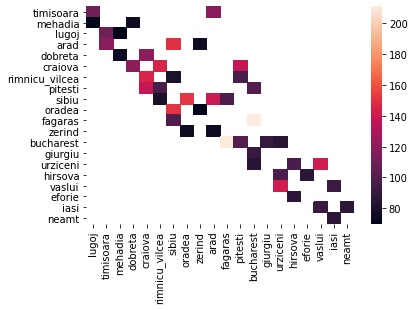

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relação de nós e arestas
df = pd.DataFrame(data)
sns.heatmap(df)

In [53]:
df.head().style.background_gradient()

,lugoj,timisoara,mehadia,dobreta,craiova,rimnicu_vilcea,sibiu,oradea,zerind,arad,fagaras,pitesti,bucharest,giurgiu,urziceni,hirsova,eforie,vaslui,iasi,neamt
timisoara,111.000000,nan,nan,nan,nan,nan,nan,nan,nan,118.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mehadia,70.000000,nan,nan,75.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
lugoj,nan,111.000000,70.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
arad,nan,118.000000,nan,nan,nan,nan,150.000000,nan,75.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dobreta,nan,nan,75.000000,nan,120.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Como vimos a função de ativação do algoritmo A* é definida pela fórmula:

\begin{equation}
    \mathbf{f(n) = g(n) + h(n)}
\end{equation}

Em python podemos definir a função de custo da seguinte forma:

In [40]:
def f(steps, cost, h):
    """
    Calculate the f(n) being the function cost from a node.

    param : steps : <int> -> Total steps taken;
    param : cost : <int> -> Cost to move to the node;
    param : h : <int> -> Heuristic cost value to get from node to target;
    return : <int>
    """
    return (steps + cost) + h

Entã supondo que estamos indo para Bucharest, viemos de Sibiu e estamos em Fagaras, demos um total de `99` passos, ainda faltam `211` passos partindod e Fagaras para Bucharest e a heurística de Fagaras para Bucharest é de `176` para chegar em Bucharest. Sabendo disso, se calcularmos a **f(n)** da seguinte forma:

\begin{equation}
    \mathbf{f(n) = 99 + 176 + 211 = 486}
\end{equation}

Em python:

In [42]:
# Heurística para Bucharest partindo de Fagaras
h = h_table['fagaras']

# Passos necessários de Sibiu para Fagaras
steps = data['sibiu']['fagaras']

# Passos necessários para se deslocar de Fagaras para Bucharest
next_steps = data['fagaras']['bucharest']

# Custo de Fagaras para Bucharest vindo de Sibiu
cost = f(steps, next_steps, h)

In [43]:
print(f'Heurística para Bucharest partindo de Fagaras: {h}')
print(f'Passos necessários de Sibiu para Fagaras: {steps}')
print(f'Passos necessários para se deslocar de Fagaras para Bucharest: {next_steps}')
print(f'Custo de Fagaras para Bucharest vindo de Sibiu: {cost}')

Heurística para Bucharest partindo de Fagaras: 176
Passos necessários de Sibiu para Fagaras: 99
Passos necessários para se deslocar de Fagaras para Bucharest: 211
Custo de Fagaras para Bucharest vindo de Sibiu: 486


### Algoritmo A*

O pseudocódigo para o algoritmo de busca A* (Á-Estrela) é definido abaixo:

![pseudocodigo](https://i.ibb.co/8zXJBtx/Captura-de-Tela-2021-02-25-a-s-13-33-59.png)


## Exercício

Proposta:

- **Buscar o caminho partindo de Oradea para Bucharest utilizando o algoritmo A*.**

![exercicio](https://i.ibb.co/s98jRF6/Captura-de-Tela-2021-02-25-a-s-15-08-26.png)

Antes de implementar o código para realizar o processamento, vamos manualmente explorar os nós realizando a implementação do diagrama de árvore com base no algoritmo de A*:

![](exercicio.svg)

Para implementar o algoritmo a seguir serão implementadas duas funções, a primeira é uma função **secreta** não apresentada no pseudocódigo, cuja pode, com uma pitada de discernimento, ser facilmente ser delineada a partir das ~~charadas~~ dicas dada pelo ~~Mestre dos Magos~~ Professor Razar.

<br />
<details>
    <summary>Spoiler</summary>
    <img src="https://i.ibb.co/CMrZ7t0/Captura-de-Tela-2021-02-23-a-s-18-08-47.png" align="center">
</details>
<br />

![dungeon_master](https://media1.tenor.com/images/4db3292c7a377dfb107b532f78800ba7/tenor.gif?itemid=9659897)

Brincadeiras a parte as funções para encontrar a solução, e implementar o A* com 

In [44]:
def get_solution_path(start, target, explored, data):
    """
    Move backwards all the explored nodes checking its neighbors to define the
    path sequence to reach the objective, returning a list of node names.

    param : start : <str> -> Start node name;
    param : target : <str> -> Target node name;
    param : explored : <list> -> List of explored node names;
    param : data : <dict> -> Dict of data nodes;

    return : <list> of <str>
    """
    solution = []

    # move backwards to find the path
    explored = list(reversed(explored))
    for node in explored:
        if node == start:
            solution.insert(0, node)
            return solution

        connections = list(data[node])
        try:
            next_node = explored[explored.index(node)+1]
        except IndexError:
            if node == start:
                solution.insert(0, node)
        else:
            if not next_node in connections:
                del explored[explored.index(next_node)]
                solution.insert(0, node)
            else:
                solution.insert(0, node)

    return solution

In [45]:
def a_star(target, data, h_data, start=None):
    """
    This function implements am A* Search algorithm to find a path from
    a start point to an target point in a dictionary of node
    (locations, points, etc..) containing the child and distace cost to
    each possible neighbor. The dict is the data param, which MUST HAVE
    the following structure:

    {
        <str> : {
            <str>: <int>,
            <str>: <int>,
            ...
        },
        ...
    }

    param : target : <str> -> Target objective;
    param : data : <dict> -> Data nodes;
    param : h_data : <dict> -> h values for heuristic calculation;
    param : start : <str> -> start node;
            if no start point is inputed, the start point will be the
            first element of the data dict.

    return : <list>
    """
    if not data:
        # If  its an empty dict return empty list
        return []

    if not start:
        # If no start point was inputed it will start from the first key
        start = next(iter(data))

    steps = 0
    edge = []
    explored = []

    node = data[start]
    f_node = f(steps, 0, h_data[start])
    edge.append([start, f_node])
    previous = start

    while edge:
        if not edge:
            return get_solution_path(start, target, explored, data)

        node_tuple = edge.pop(0)
        node_name, f_node, = node_tuple[0], node_tuple[1]
        steps += data[previous].get(node_name, 0)
        explored.append(node_name)
        possibilities = data[node_name]

        if node_name == target:
            return get_solution_path(start, target, explored, data)

        for child in possibilities:
            f_child = f(steps, data[node_name][child], h_data[child])
            child_node = [child, f_child]
            edge_labels = [node[0] for node in edge]

            if child not in edge_labels and child not in set(explored):
                edge.append(child_node)

            else:
                for node in edge:
                    if child == node[0] and f_child > node[1]:
                        edge[edge.index(node)][1] = f_child

        # Remember this node as previous for the next iteration
        previous = node_name

        # Arrange the edge upward based on cost
        edge = sorted(edge, key=lambda node: node[1])


Com o algoritmo implementado podemos validar nossa hipótese de objetivo que descobrimos através do diagrama de árvore:

In [49]:
target = 'bucharest'
start_point = 'oradea'

solution = a_star(target, data, h_table, start=start_point)

A função retorna uma lista ordenada com melhor caminho do ponto inicial até o ponto final

In [51]:
result = ' -> '.join(item for item in solution)
print(f'Melhor caminho de Oradea até Bucharest:\n{result}')

Melhor caminho de Oradea até Bucharest:
oradea -> sibiu -> rimnicu_vilcea -> pitesti -> bucharest
